# B714Launchpad产品模式 —— Goldmine 

## 模式介绍

Goldmine (掘金,Launchpad) 模式为代币发行者和交易者提供了平等且团结互惠的财富增长机会。

用户可向 B714 支付 0.05 BNB 以提交一个"代币提案"。提案中需包含下列信息:

* 代币名称
* 代币Ticken
* 代币 Logo
* 介绍(可选)
* 社交链接 (可选)

**Goldmine 以0:00~23:59 (UTC+0)为一个周期，每日循环举行**。每日的新提案将会被提交至下一自然日的 Goldmine 面板。

## 掘金阶段规则

### Basic 黄金积分的产出

代币发行者、交易者可以向不同的代币提案锁定不限额度的 BNB。每个 BNB 每小时将会产出 1,000 个"黄金积分"

“黄金积分"将会在每个周期内的 0:00~22:59 开始累积。23:00 时，全部提案中所积累的黄金积分将会被记录并锁定。**累计产出 Basic 黄金积分"最多"的代币提案（且需超过 1，000，000，对应10个BNB被拿去加池子，至少 43.5 个BNB挖满23h）**将会胜出，提按批准通过。

### Bonus 黄金积分的产出

在锁定 BNB 挖取的黄金积分之外，用户在锁定BNB时还可以选择线性解锁提取应收的 meme 代币，并获取一定的额外加成。加成规则如下：

| 线性解锁周期 (day) | 加成倍数 (x) |
|--------------------|--------------|
| 365                | 5            |
| 90                 | 2            |
| 30                 | 1.5          |
| 14                 | 1.25         |
| 7                  | 1.1          |
| 0                  | 1.0          |


### 提案否决 （失败）

**该周期内的其余代币提案则被否决❌**。被否决提案中进行Godmining的用户所累积的黄金积分将会被清除，锁定的BNB在扣除 gas 费和固定参与费用0.001BNB后，将会被全额返还给参与 goldmining 的用户。

在 1:00 ~ 23:59 时间段之间，用户可以选择强制退出掘金，并撤出锁定的 BNB，同时支付锁定额度0.5% 的罚金。

### 提案通过（毕业）

胜出的代币将会在当日 23：00~23：59 内被部署至BNB chan，同时该提案下进行 goldming 用户的 BNB 将会以 100,000 基础黄金积分 / 1 BNB 的比例被扣除，并兑换成该提案对应的代币，剩余的BNB在扣除 gas 费和固定参与费用 0.001 BNB 后，将会被全额返还给参与 Goldmining 的用户。

若该周期挖满23小时的情况下，每1个 BNB，将会产生 23,000个黄金积分，并有 0.23 个 BNB 用于兑换代币。

若该周期只挖了10个小时，每1个BNB，将会产生 10，000个黄金积分，并有0.1个 BNB 用于兑换代币。

总计将有 miningSupply 的代币被分配给参与 Goldmining 的用户。剩余的 totalSupply-miningSupply 的代币，将会与该提案内用于兑换代而的 BNB，以及该周期内累积的奖池(参与费用+罚金) 一同添加至Pancakeswep v3 池。

### 兑换代币的数量

用户在Goldmining结束后获取的代币数量与 Basic 黄金积分和 Bonus 黄金积分有关。

```python
totalGold = basicGold + bonusGold
```

每个用户应获得的代币数量为：


$$

\frac{\text{totalGold}_{\text{i}}}{\sum_{i=0}^{n} \text{totalGold}_i} * miningSupply 

$$ 

## LP 阶段规则

### LP 费用及分配

LP 阶段添加 PancakeSwap V3 池，手续费率为 0.3%。LP 费用中的 40% 分配给代币发行者， 60% 分配给平台。

### 线性解锁



In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
import pandas as pd 

sb.set_style("darkgrid")

## 参数配置

In [3]:
miningSupply = 800000000 
lpSupply = 200000000
totalSupply = 1000000000

BNB_Price  = 640 #USD

### 初始池子中BNB数量对应的初始市值

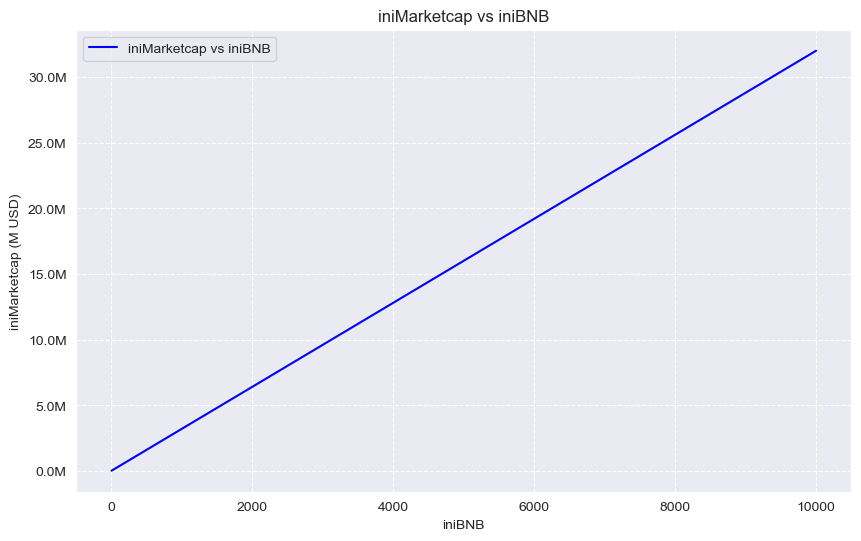

In [4]:
# 初始被消耗用于加池子的BNB
iniBNB = np.arange(10, 10000, 1)
iniMarketcap = np.zeros(len(iniBNB))
for i in range(len(iniBNB)):
    iniMarketcap[i] = iniBNB[i] * BNB_Price / (lpSupply / totalSupply)

plt.figure(figsize=(10, 6))
plt.plot(iniBNB, iniMarketcap, label='iniMarketcap vs iniBNB', color='blue')

plt.title('iniMarketcap vs iniBNB')
plt.xlabel('iniBNB')
plt.ylabel('iniMarketcap (M USD)')


def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(millions)

plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, which="both", ls="--")


plt.legend()


### Basic 黄金积分和初始市值的关系

Text(0, 0.5, 'iniMarketcap (M USD)')

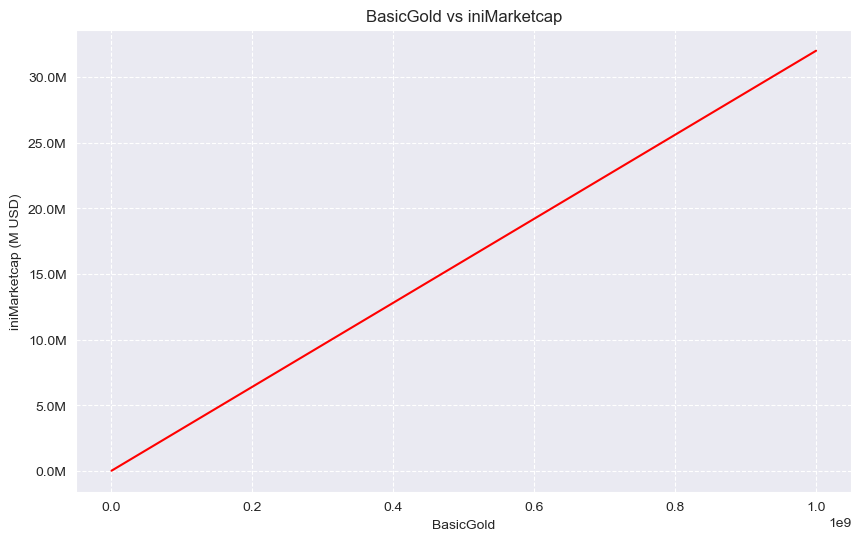

In [5]:
iniBNB = np.arange(10, 10000, 1)
basicGold = iniBNB * 100000  # basicGold的数量
iniMarketcap = np.zeros(len(iniBNB))

for i in range(len(iniBNB)):
    iniMarketcap[i] = iniBNB[i] * BNB_Price / (lpSupply / totalSupply)

plt.figure(figsize=(10, 6))

plt.plot(basicGold, iniMarketcap, label='BasicGold vs iniMarketcap', color='red')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(millions)

plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, which="both", ls="--")


plt.title('BasicGold vs iniMarketcap')
plt.xlabel('BasicGold')
plt.ylabel('iniMarketcap (M USD)')


# Mock Data 测试

In [18]:
# 导入CSV文件
df = pd.read_csv('mock_staking_data.csv')

# 计算总体统计
total_gold_sum = df['totalGold'].sum()
total_staked_bnb_sum = df['stake_amount'].sum()
total_paid_bnb_sum = df['paidBNB'].sum()
iniMarketcap = total_paid_bnb_sum * BNB_Price / (lpSupply / totalSupply)

# 增加一列每人分配的代币数额
df['allocated_tokens'] = df['totalGold'] / total_gold_sum * 800000000

# 计算 allocated_tokens 列的总和
allocated_tokens_sum = df['allocated_tokens'].sum()

print(f"总 Total Gold: {total_gold_sum:,.2f}")
print(f"总参与 BNB 数量: {total_staked_bnb_sum:,.2f}")
print(f"LP中的初始BNB数量（用户支付的总数量）: {total_paid_bnb_sum:,.4f}")
print(f"初始市值: {iniMarketcap:,.4f} USD")
print(f"Launchpad阶段分配代币总和: {allocated_tokens_sum:,.2f}")




# 按 boost multiplier 分组统计
boost_stats = df.groupby('boost_multiplier').agg({
    'id': 'count',  # 计算每个 boost 的人数
    'totalGold': ['sum', 'mean'],  # 计算每个 boost 的 totalGold 总和和平均值
    'allocated_tokens': ['sum', 'mean']  # 计算每个 boost 的分配代币总和和平均值
})

# 计算每个 boost 的 totalGold 占比
boost_stats[('totalGold', 'percentage')] = boost_stats[('totalGold', 'sum')] / total_gold_sum * 100

# 重命名列以提高可读性
boost_stats.columns = ['人数', 'Total Gold总和', 'Total Gold平均值', '分配代币总和', '分配代币平均值', 'Total Gold占比(%)']

print("\nBoost Multiplier 统计:")
print(boost_stats)

总 Total Gold: 72,147,921.66
总参与 BNB 数量: 5,663.22
LP中的初始BNB数量（用户支付的总数量）: 631.5447
初始市值: 2,020,943.0400 USD
Launchpad阶段分配代币总和: 800,000,000.00

Boost Multiplier 统计:
                   人数  Total Gold总和  Total Gold平均值        分配代币总和  \
boost_multiplier                                                   
1.00              810   51568659.00   63665.011111  5.718103e+08   
1.10               48    3341546.23   69615.546458  3.705217e+07   
1.25               44    3211409.63   72986.582500  3.560917e+07   
1.50               41    4083246.00   99591.365854  4.527638e+07   
2.00               41    4226335.80  103081.360976  4.686301e+07   
5.00               16    5716725.00  357295.312500  6.338894e+07   

                       分配代币平均值  Total Gold占比(%)  
boost_multiplier                                 
1.00              7.059387e+05        71.476292  
1.10              7.719202e+05         4.631521  
1.25              8.092993e+05         4.451146  
1.50              1.104302e+06         5.65

In [14]:
print(df['allocated_tokens'])

0      7.519152e+05
1      8.515971e+05
2      1.252893e+05
3      3.138361e+06
4      9.332782e+05
           ...     
995    6.326193e+05
996    1.218337e+06
997    2.471755e+05
998    1.461433e+06
999    2.749241e+05
Name: allocated_tokens, Length: 1000, dtype: float64
